# Millenials and Investment: an Ongoing Exploration

In case you haven't heard, [millenials are killing everything](http://www.businessinsider.com/millennials-are-killing-list-2017-8/#diamonds-12) from diamonds to department stores to designer crap to grocery chains.

Why? Sure, the recession had an impact. But also, millenials pay more attention to ethics than many multinational corporations bargain for. They cite the blood diamond trade as a major reason to spring for non-traditional engagement rings. They opt for grocery providers that can tell them where their food is coming from and under what conditions it was produced. They're ditching the fast fashion industry for higher-priced items purchased secondhand on sites like Poshmark and ThreadUp. 

And as millenials reach the age where they might accrue some savings, it makes sense that they would care about where that is going, too. In addition to millenial attendance at the NoDAPL protests, we saw thousands of millenials divest from Western Union, Bank of America, and other banks that loaned money to the project. Maybe megacorps won't change their tunes because a few thousand people stood in a field to get mowed down by water cannons, but they're more likely to sit up and listen when those same people take their hard-earned doll hairs to another playhouse.

So we see that millenials are surveying their options to spend and save according to their values. What about investing? Any personal finance 101 that isn't taught by a financial advisor will recommend a low cost index as the place to stick extra money so it can grow with the market. Most index funds, including the most recommended one (Vanguard), decide their investments via index-matching: matching their holdings to the S&P500 by market cap, with no other variables. Thing is, plenty of investors are expressing interest in taking ethical considerations into account. Some portfolios do this by blanket blocking investments in certain industries like tobacco or porn. Other more advanced optsions, like Betterment's AutoSRI portfolio, use actual ESG data to determine where they invest the money. There isn't (yet) a fully customizable option to allow folks to automatically invest their funds based on a checklist of their individual values. For a while, I've thought about building a toy version of what that might look like. 

When I talk about the idea with friends and relatives, I get the following objection: 'What about the returns?' Touche. Nobody wants to lose out on their potential earnings. At first, I figured I'd build a tolerance into the system that allowed investors to say 'These are my values, but please don't invest in a way that will trail general market performance by more than x percent.' The algorithm would then predict stock performance for each company, somehow blend that with ESG rating, and come up with a combined weight for divvying up investment money.

Before I build that, though, I need to test the assumption that high ESG ratings *do* correlate negatively with returns. If they don't, there's no need for the tolerance measure in the first place.

I'm not the first person to run correlations along these lines. Dorfleitner, Utz, and Wimmer published a paper on this just last year. [Their analysis](http://www.tandfonline.com/doi/full/10.1080/20430795.2017.1403272?scroll=top&needAccess=true) suggests that higher corporate social responsibility ratings *increase* returns over a long period of time ("long" being a 12 year period from 2002-2014). They even identify three specific areas that correlate with higher than average returns: emission and resource reduction, workforce, and society. So in my exploration, I'll dig into some specific CSR breakdowns with the data I have on S&P 500 companies. 

In [2]:
import pandas as pd

## Correlating KLD ESG Ratings to Stock Performance, 1991-1999

Let's determine whether we notice any correlation between companies' environmental, social, and governmental ratings and their stock performance during the 1990s. 

### First, we pull in the ESG data. 

These come from KLD and are now distributed by MSGI. I pulled them from an academic database. Don't rerun this notebook because I didn't push the actual data to Github. 

In [3]:
y91 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1991 HistoricalSpreadsheet_STATS.xls')
y92 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1992 HistoricalSpreadsheet_STATS.xls')
y93 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1993 HistoricalSpreadsheet_STATS.xls')
y94 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1994 HistoricalSpreadsheet_STATS.xls')
y95 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1995 HistoricalSpreadsheet_STATS.xls')
y96 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1996 HistoricalSpreadsheet_STATS.xls')
y97 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1997 HistoricalSpreadsheet_STATS.xls')
y98 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1998 HistoricalSpreadsheet_STATS.xls')
y99 = pd.read_excel('../stockproject/12231046.1990-1999.stats/1999 HistoricalSpreadsheet_STATS.xls')
nineties = [y91, y92, y93, y94, y95, y96, y97, y98, y99]

In [ ]:
def filter_500(df):
    return df[df['SP500'] == True]

sp500_90s = []    
for data in nineties:
  sp500_90s.append(filter_500(data))

aggregate_data = pd.concat(sp500_90s)
aggregate_data = aggregate_data[['Ticker', 'EMP-str-A','EMP-str-B','EMP-str-C','EMP-str-D','EMP-str-F','EMP-str-G']]
aggregate_data['EMP-sum'] = aggregate_data.sum(axis=1)

In [41]:
grouping = aggregate_data.groupby(['Ticker'])['EMP-sum'].sum()

In [42]:
esg_marker_data = pd.DataFrame({'esg_marker' : grouping}).reset_index()
esg_marker_data.sort_values(by=['esg_marker'], ascending=False).head()

,Ticker,esg_marker
736,XRX,18
202,DCN,18
493,NUE,17
730,WTHG,16
302,GLW,16


### Second, we pull in stock performance data.

This data contains stock returns by quarter for S&P500 companies dating back to 1979. We'll pull the columns for the '90s for now.

In [43]:
price_data = pd.read_excel('../stockproject/Cleaned_Researcher_Dataset.xlsx')

In [44]:
new_header = price_data.iloc[0] #grab the first row for the header
content = price_data[1:] #take the data less the header row
content.columns = new_header #set the header row as the df header
content.head()

tickers = content.iloc[:,0:2]
tickers.columns = list(new_header)[0:2]

dates = content.iloc[:,45:92]
dates.columns = list(new_header)[45:92]

result = pd.concat([tickers, dates], axis=1)
result.head()

,Ticker,Company Name,1989-12-31 00:00:00,1990-03-31 00:00:00,1990-06-30 00:00:00,1990-09-30 00:00:00,1990-12-31 00:00:00,1991-03-31 00:00:00,1991-06-30 00:00:00,1991-09-30 00:00:00,...,1999-03-31 00:00:00,1999-06-30 00:00:00,1999-09-30 00:00:00,1999-12-31 00:00:00,2000-03-31 00:00:00,2000-06-30 00:00:00,2000-09-30 00:00:00,2000-12-31 00:00:00,2001-03-31 00:00:00,2001-06-30 00:00:00
1,A,Agilent Technologies Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,73.75,48.94,54.75,30.73,32.5
2,AA,Alcoa Inc,75,64.75,63.75,62.63,57.63,65.5,67.5,63.88,...,41.19,61.88,62.06,83,70.25,29,25.31,33.5,35.95,39.4
3,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAL (Alex),Alexander & Alexander,30.63,26.75,24.38,17.88,23.13,26.25,22.5,20.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AAP,Advance Auto Parts Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Third, we combine the data into one dataframe.

We find all the companies for which we have both stock price data and ESG data, and we put the information together.

In [45]:
tickers = list(esg_marker_data["Ticker"]) #get all the company tickers for which we have esg data
prices_for_esg_companies = result[result["Ticker"].isin(tickers)] #get the stock data from companies in that list
prices_for_esg_companies.shape

(595, 49)

Hm, we have 399 of them. 100 are missing. Why?

In [47]:
relevant_esgs = esg_marker_data[esg_marker_data["Ticker"].isin(list(prices_for_esg_companies["Ticker"]))]

In [49]:
all_data = pd.concat([relevant_esgs, prices_for_esg_companies], axis = 1) #put the esg and stock data in one dataframe
all_data["esg_marker"].unique()

array([ 13.,   1.,   6.,   9.,   0.,   4.,  nan,   8.,   2.,   3.,   7.,
         5.,  10.,  12.,  18.,  14.,  11.,  16.,  17.,  15.])

In [50]:
#let's do some cleanup so we only have the columns we need.
clean_data = all_data.drop(['CUSIP', 'SP500', 'DS400', 'Russell1000', 'LCS', 'Russell2000', 'BMS'], axis = 1)
clean_data.head()

,Ticker,esg_marker,Ticker,Company Name,1989-12-31 00:00:00,1990-03-31 00:00:00,1990-06-30 00:00:00,1990-09-30 00:00:00,1990-12-31 00:00:00,1991-03-31 00:00:00,...,1999-03-31 00:00:00,1999-06-30 00:00:00,1999-09-30 00:00:00,1999-12-31 00:00:00,2000-03-31 00:00:00,2000-06-30 00:00:00,2000-09-30 00:00:00,2000-12-31 00:00:00,2001-03-31 00:00:00,2001-06-30 00:00:00
0,AA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAL,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAPL,6.0,AA,Alcoa Inc,75,64.75,63.75,62.63,57.63,65.5,...,41.19,61.88,62.06,83,70.25,29,25.31,33.5,35.95,39.4
3,ABS,9.0,AAL,American Airlines Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Now let's strip this down so we can calculate returns over the course of the ten year period.
len(clean_data.columns.values)

51

In [52]:
esg_columns = clean_data.iloc[:,1:4]
esg_columns.columns.values

array(['esg_marker', 'Ticker', 'Company Name'], dtype=object)

In [53]:
start_stock_columns = clean_data.iloc[:,4:5]

string_header = ['start_stock_prices'] #grab the first row for the header
start_stock_columns = start_stock_columns[1:] #take the data less the header row
start_stock_columns.columns = string_header #set the header row as the df header

start_stock_columns.columns.values

array(['start_stock_prices'], dtype=object)

In [54]:
end_stock_columns = clean_data.iloc[:,48:49]

string_header = ['end_stock_prices'] #grab the first row for the header
end_stock_columns = end_stock_columns[1:] #take the data less the header row
end_stock_columns.columns = string_header #set the header row as the df header

end_stock_columns.columns.values

array(['end_stock_prices'], dtype=object)

In [55]:
minimum_data = pd.concat([esg_columns, start_stock_columns, end_stock_columns], axis=1)
minimum_data.shape
minimum_data.head()

,esg_marker,Ticker,Company Name,start_stock_prices,end_stock_prices
0,13.0,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN
2,6.0,AA,Alcoa Inc,75,33.5
3,9.0,AAL,American Airlines Group,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN


In [56]:
#Let's filter this down to only those companies for which we have
# a starting and ending stock price over this period. 
yes_start_date = minimum_data[minimum_data['start_stock_prices'].notnull()]
yes_end_date = yes_start_date[yes_start_date['end_stock_prices'].notnull()]
yes_end_date.head()

,esg_marker,Ticker,Company Name,start_stock_prices,end_stock_prices
2,6.0,AA,Alcoa Inc,75,33.5
6,NaN,AAPL,Apple Inc.,35.25,14.88
12,0.0,ABS,Albertson's Inc.,55.5,26.5
13,0.0,ABT,Abbott Laboratories,68,48.44
20,2.0,ACV,Alberto-Culver Co.,44.63,42.81


Let's pick a category to start with. Why CEO (DIV-str-A)? 

According to the KLD documentation, this category indicates if The company's chief executive officer is a woman or a member of a minority group.

In [59]:
yes_end_date['returns'] = yes_end_date['end_stock_prices'] / yes_end_date['start_stock_prices']
yes_end_date = yes_end_date.fillna(0) #any company without num_yrs_min_CEO gets 0
yes_end_date.sort_values('esg_marker', ascending=False).head()


,esg_marker,Ticker,Company Name,start_stock_prices,end_stock_prices,returns
404,12.0,ECL,Ecolab Inc.,28.50,43.19,1.515439
683,9.0,K,Kellogg Co.,67.63,26.25,0.388141
535,9.0,GM,General Motors,42.25,50.94,1.205680
411,9.0,EK,Eastman Kodak Co.,41.13,39.38,0.957452
343,9.0,CVS,CVS Health Corp.,44.63,59.94,1.343043


I'll comment briefly on a trend in this data. In 1991, when recordings begin, there is only one S&P500 company (out of 500)with a not-white-dude CEO. By 1999, we're up to a still-abysmal-but-better number at 20. 

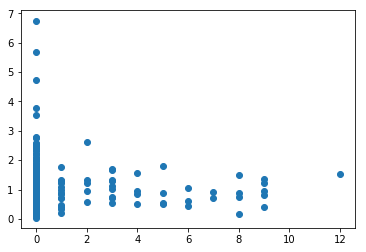

In [61]:
import matplotlib.pyplot as plt
import random
%matplotlib inline  

# for title, group in div_str_a.groupby('DIV-str-A'):
#     my_randoms = random.sample(range(100), len(group))
#     returns = list(group['returns'])
#     plt.scatter(x=my_randoms, y=returns)

num_yrs = yes_end_date['esg_marker']
returns = yes_end_date["returns"]
plt.scatter(x=num_yrs, y=returns)

In [81]:
aggregate_analysis = yes_end_date.groupby('esg_marker')['returns'].agg(['mean','median','max', 'min','count'])
aggregate_analysis

,mean,median,max,min,count
esg_marker,,,,,
0.0,1.225683,1.055197,6.750000,0.046264,193
1.0,0.878450,0.867854,1.769283,0.189308,14
2.0,1.336767,1.228140,2.608000,0.559632,5
3.0,1.122659,1.111485,1.694873,0.537245,9
4.0,0.968059,0.907968,1.560000,0.496302,4
5.0,0.932626,0.712878,1.791579,0.513169,4
6.0,0.701173,0.615640,1.041212,0.446667,3
7.0,0.819503,0.819503,0.912281,0.726726,2
8.0,0.812982,0.802949,1.494318,0.151714,4


In orange, we have companies with minority CEOs in 1999. In blue, companies with non-minority CEOs in 1999. The height of each dot represents returns on that company's stock price over the '90s. This isn't a ton of data from which to extrapolate anything, and we won't extrapolate from this. We randomly chose DIV-str-A as a way to get our general analytical tools in place. Now we can try running this on some other ESG metrics with more data rigor and see what we find.

In [78]:
plt.scatter(x=aggregate_analysis.i, y=aggregate_analysis['mean'])

AttributeError: 'DataFrame' object has no attribute 'groups'